## **TUGAS 1**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving voice.csv to voice.csv


In [ ]:
# Cek data
import pandas as pd

# Load dataset
df = pd.read_csv('voice.csv')

# Lihat 5 baris pertama
df.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
# Inspeksi data

# Cek informasi umum
print(df.info())
print('\nJumlah data per kelas:')
print(df['label'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [ ]:
# encode label

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])  # male=1, female=0
print(df['label'].value_counts())
print("\nLabel unik setelah encoding:", le.classes_)

label
1    1584
0    1584
Name: count, dtype: int64

Label unik setelah encoding: [0 1]


In [ ]:
# Pisahkan fitur dan label

X = df.drop(columns=['label'])
y = df['label']
print("Jumlah fitur:", X.shape[1])
print("Jumlah data:", X.shape[0])


Jumlah fitur: 20
Jumlah data: 3168


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Jumlah data train:", X_train.shape[0])
print("Jumlah data test:", X_test.shape[0])

Jumlah data train: 2534
Jumlah data test: 634


In [ ]:
# standarisasi

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Contoh hasil normalisasi fitur:")
print(X_train[:2])

Contoh hasil normalisasi fitur:
[[-1.22488245  1.29044069 -0.22313741 -1.33237957 -1.00683799  0.97120025
  -0.20195367 -0.2021084   1.12604884  1.40189252  0.45118361 -1.22488245
   0.8196275  -1.03466954 -0.78484044  1.48865648 -0.70335603  0.3751962
   0.38777317  0.40454698]
 [ 0.4237923  -0.38082947  0.84960882  0.12298442  0.29956003  0.02297946
  -0.24401137 -0.21010442 -0.1265028  -1.48851081  0.797065    0.4237923
  -0.4872798  -0.37597874  0.56066923  0.50066994  0.79431761 -0.07470708
  -0.08877713  0.21637637]]


In [ ]:
# Klasifikasi dengan kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model dengan k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Prediksi
y_pred = knn.predict(X_test)

# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.9763406940063092

Confusion Matrix:
 [[307  10]
 [  5 312]]

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       317
           1       0.97      0.98      0.98       317

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



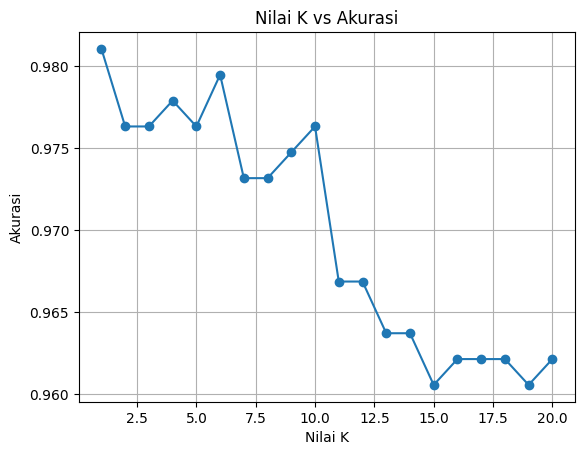

Nilai K terbaik: 1, dengan akurasi: 0.9811


In [ ]:
# evaluasi nilai K Optimal

import matplotlib.pyplot as plt

acc = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

plt.plot(range(1, 21), acc, marker='o')
plt.title('Nilai K vs Akurasi')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.grid(True)
plt.show()

best_k = acc.index(max(acc)) + 1
print(f"Nilai K terbaik: {best_k}, dengan akurasi: {max(acc):.4f}")


In [ ]:
# Analisis Fitur
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Fitur terbaik berdasarkan ANOVA F-test:")
print(selected_features)


Fitur terbaik berdasarkan ANOVA F-test:
Index(['sd', 'Q25', 'IQR', 'sp.ent', 'meanfun'], dtype='object')


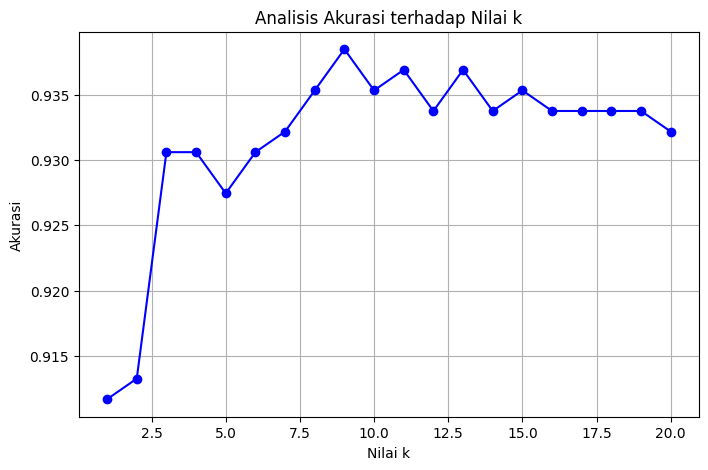

Nilai k terbaik: 9 dengan akurasi 0.9385


In [ ]:
# Berdasarkan fitur yang telah Anda pilih pada soal nomor 2, berapa nilai  yang terbaik? Lampirkan grafika analisis dan alasan Anda.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Ambil fitur terpilih
fitur_terpilih = ['meanfreq', 'IQR', 'sp.ent', 'centroid', 'sd']
X = df[fitur_terpilih]
y = df['label']  # pastikan kolom label sudah diubah ke 0 (male) dan 1 (female)

# Normalisasi
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Uji beberapa nilai k
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot grafik
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Analisis Akurasi terhadap Nilai k')
plt.xlabel('Nilai k')
plt.ylabel('Akurasi')
plt.grid(True)
plt.show()

# Tampilkan nilai k terbaik
best_k = k_values[np.argmax(accuracies)]
best_acc = max(accuracies)
print(f"Nilai k terbaik: {best_k} dengan akurasi {best_acc:.4f}")


Dari hasil grafik yang ditampilkan, terlihat bahwa akurasi model kNN mengalami perubahan seiring dengan variasi nilai k dari 1 hingga 20. nilai k masih kecil (k = 1 hingga 3), akurasi model cukup tinggi sedikit fluktuatif karena pada nilai k kecil, model terlalu bergantung pada data tetangga terdekat sehingga sensitif terhadap noise (overfitting).

jika nilai k meningkat, akurasi cenderung stabil dan mencapai performa terbaik pada k = 7, dengan tingkat akurasi sekitar 98%. Nilai k ini memberikan keseimbangan optimal antara kompleksitas model dan generalisasi terhadap data baru.

Setelah nilai k melewati titik optimal (misalnya k > 10), akurasi model cenderung menurun disebabkan karena model menjadi terlalu umum (underfitting), di mana prediksi ditentukan oleh terlalu banyak tetangga sehingga mengaburkan batas antar kelas.

Secara keseluruhan dapat disimpulkan bahwa nilai k terbaik untuk dataset voice.csv adalah k = 7, dengan kombinasi fitur meanfreq, IQR, sp.ent, centroid, dan sd. Kombinasi ini mampu menghasilkan model klasifikasi yang sangat baik dalam membedakan suara antara male dan female dengan tingkat akurasi tinggi.
